# Run simple urban extent calculation based on 1km gridded population data

In [16]:
import sys, os, importlib
import rasterio

import geopandas as gpd
import pandas as pd

import GOST_Urban.UrbanRaster as urban


In [2]:
# Define input population raster
tutorial_folder = "../../data/tutorial_data"
aoi_file = os.path.join(tutorial_folder, "AOI.geojson")
pop_file = os.path.join(tutorial_folder, "wp_2020_1k_AOI.tif")

# Define output files
out_urban = os.path.join(tutorial_folder, "urban_extents.geojson")
out_hd_urban = os.path.join(tutorial_folder, "hd_urban_extents.geojson")

inAOI = gpd.read_file(aoi_file)

# Shouldn't need to execute this unless you change your AOI; 
#    you will need to find a global population to extract from
if not os.path.exists(pop_file):
    sys.path.append("../../../gostrocks/src")
    import GOSTRocks.rasterMisc as rMisc
    global_population = "/path/to/global/pop_layer/ppp_2020_1km_Aggregated.tif"
    inR = rasterio.open(global_population)
    rMisc.clipRaster(inR, inAOI, pop_file)
    
inR = rasterio.open(pop_file)

Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
# Initiate the urban calculator
urban_calculator = urban.urbanGriddedPop(inR)
#urban_calculator.calculateUrban?

In [4]:
# Extract the urban extents (minimum density 300/km2, minimum total population 5000)
urban_extents = urban_calculator.calculateUrban(densVal=300, totalPopThresh=5000, 
                                               smooth=False, queen=False,
                                               verbose=True)

10:58:30	: Read in urban data
10:58:30	: Creating Shape 0
10:58:38	: Creating Shape 1000
10:58:46	: Creating Shape 2000
10:58:53	: Creating Shape 3000
10:58:59	: Creating Shape 4000
10:59:06	: Creating Shape 5000
10:59:13	: Creating Shape 6000
10:59:16	: Creating Shape 7000


In [5]:
# Extract the high density urban extents (minimum density 1500/km2, minimum total population 50000)
hd_urban_extents = urban_calculator.calculateUrban(densVal=1500, totalPopThresh=50000, 
                                               smooth=True, queen=True,# high density extents use queen's case contiguity, and 
                                               verbose=True) #High density extents have hole smoothing applied.

10:59:18	: Read in urban data
10:59:18	: Creating Shape 0
10:59:25	: Creating Shape 1000


C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\GOST_Urban\UrbanRaster.py:322: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xxGeom['geometry'] = xxGeom.buffer((popRaster.res[0] / 2))


In [6]:
urban_extents.to_file(out_urban, driver="GeoJSON")
hd_urban_extents.to_file(out_hd_urban, driver="GeoJSON")

# Mapping tutorial results

In [8]:
import GOSTRocks.mapMisc as mapMisc

In [17]:
# Read in urban extents
hd_urban_extents = gpd.read_file(out_hd_urban)
hd_urban_extents['TYPE'] = 1
urban_extents = gpd.read_file(out_urban)
urban_extents['TYPE'] = 0

combo_extents = pd.concat([hd_urban_extents, urban_extents])
combo_extents.head()

,group,ID,Pop,geometry,TYPE
0,0.0,1920,8.631687e+04,"POLYGON ((-79.47625 44.07875, -79.43458 44.078...",1
1,1.0,1921,2.058095e+05,"POLYGON ((-78.87625 43.95375, -78.83458 43.953...",1
2,2.0,1922,1.838872e+05,"POLYGON ((-79.04292 43.90375, -79.00958 43.903...",1
3,3.0,1924,4.903070e+06,"POLYGON ((-79.45958 43.93708, -79.45125 43.937...",1
4,4.0,1925,8.413600e+04,"POLYGON ((-79.87625 43.54542, -79.85958 43.545...",1


Error adding basemap


C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\GOSTRocks\mapMisc.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, mdata in v_data.groupby('tomap'):


<module 'matplotlib.pyplot' from 'C:\\wbg\\Anaconda3\\envs\\urban_test\\Lib\\site-packages\\matplotlib\\pyplot.py'>

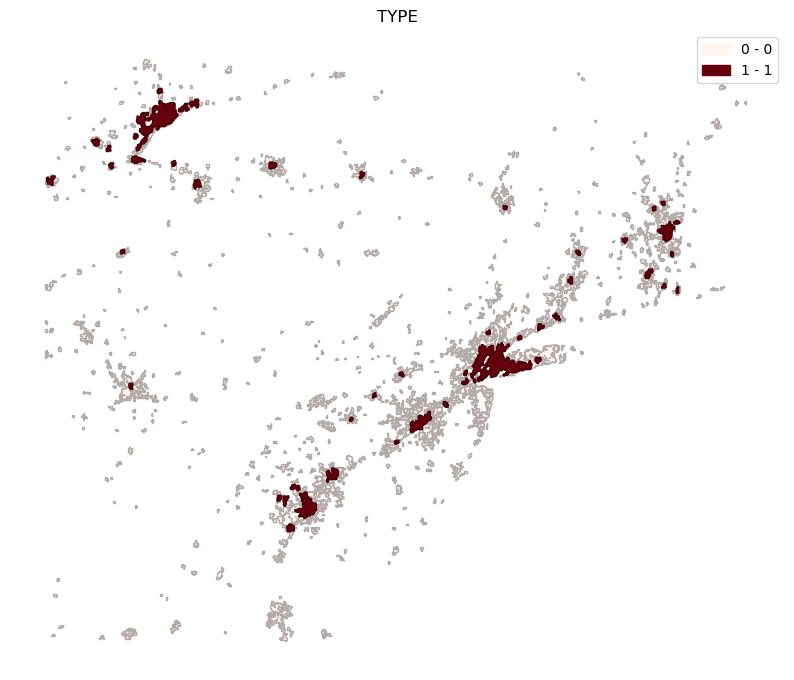

In [22]:
mapMisc.static_map_vector(combo_extents, "TYPE", edgecolor='darker')

In [20]:
mapMisc.static_map_vector?

In [26]:
iso = 'GHA'
wb_url = f'https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2020/{iso.upper()}/{iso}_ppp_2020_1km_Aggregated.tif'

RasterioIOError: CURL error: schannel: CertGetCertificateChain trust error CERT_TRUST_IS_UNTRUSTED_ROOT